In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [103]:
df = pd.read_csv('train.csv')
y = df['SalePrice']
X = df.drop('SalePrice',axis=1)

In [104]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


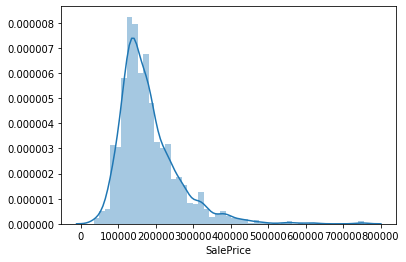

In [17]:
#Exploritory Data Analysis
sns.distplot(y)

From this graph it appears most houses are in the 100 - 200 thousand dollar range with a few higher priced ones. It might be benefial to just kick out the higher priced ones.

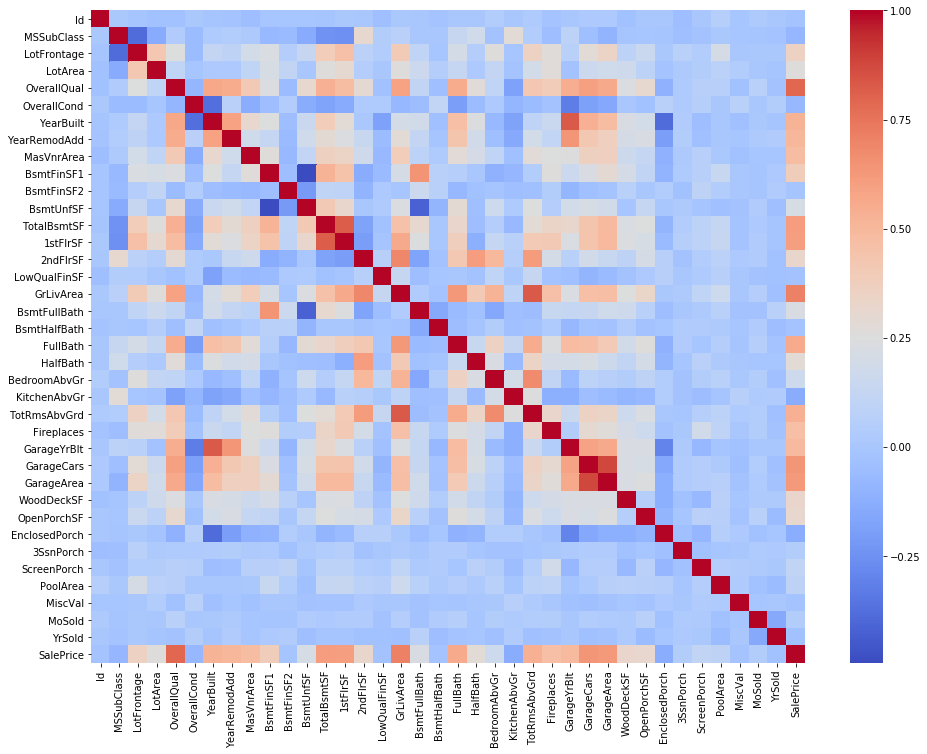

In [139]:
fig = plt.figure(figsize=(16,12))
sns.heatmap(df.corr(),cmap='coolwarm')

### Heatmap

Based on the correlation heatmap a few key variables to look at are OverallQual, The squarefeet ones, garage info, living area and the year. Need to be careful with not including too many variables that overlap that can add unintended bias into the model.

## MSSubClass

First variable is MSSubClass which classifys the type of property. Can look at the amount of each one and the average sale price of each.


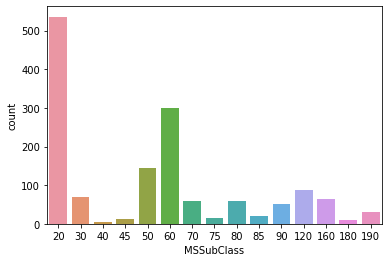

In [46]:
sns.countplot(x='MSSubClass',data=df)

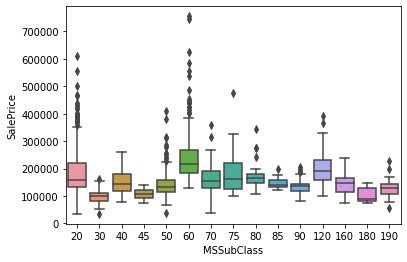

In [47]:
sns.boxplot(x='MSSubClass',y='SalePrice',data=df)

MSSubClass is not a continuous variable but is a classification variable. - If used in the final model needs to be converted to dummy variables. The box plots show that the sale price is different for different subclasses and it should be included in the model. 

## MSZoning

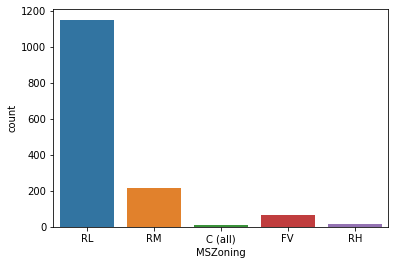

In [48]:
sns.countplot(x='MSZoning',data=df)

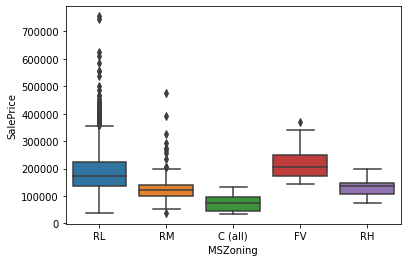

In [50]:
sns.boxplot(x='MSZoning',y='SalePrice',data=df)

The Zoning of the property also appears to greatly effect the sale price of the house. 

## LotFrontage

In [54]:
df['LotFrontage'].isnull().sum()

259

There is a large number of null values. Might need to either figure out a way to predict this value or drop it all together.

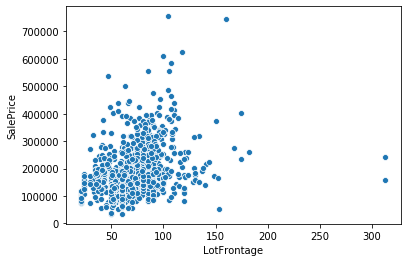

In [55]:
sns.scatterplot(x='LotFrontage',y='SalePrice',data=df)

Not explicitly clear that there is a relationship between LotFrontage and SalePrice

## LotArea

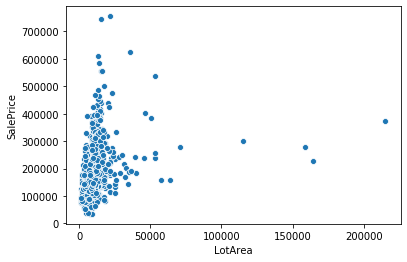

In [57]:
sns.scatterplot(x='LotArea',y='SalePrice',data=df)

Again no clear example of a relationship

## Street

In [58]:
df['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

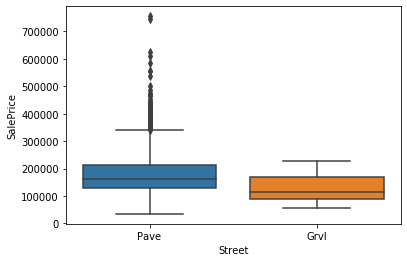

In [59]:
sns.boxplot(x='Street',y='SalePrice',data=df)

A simple dummy variable for Street should help the model as gravel road houses on average are much cheaper.

## Alley

The alley variable uses Nan to mean there is no Alley. Need to change this so that it actually has a value of None that can be made into a dummy variable

In [106]:
def change_null(alley):
    try:
        if np.isnan(alley) == True:
            x = 'None'
    except TypeError:
        x = alley
    return x
df['Alley'] = df.apply(lambda x: change_null(x['Alley']), axis=1)

In [107]:
df['Alley'].unique()

array(['None', 'Grvl', 'Pave'], dtype=object)

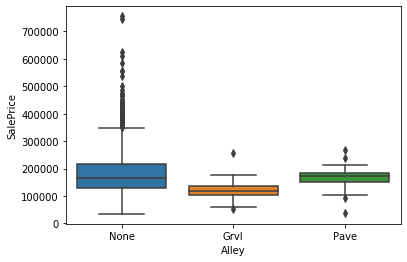

In [109]:
sns.boxplot(x='Alley',y='SalePrice',data=df)

There is a clear difference between having a gravel and paved alley but the No alley option vaires widely. 

## LotShape

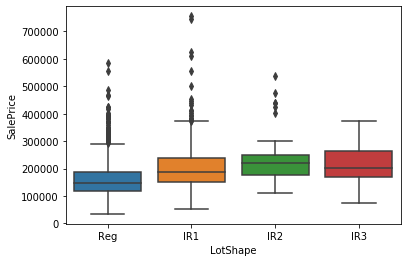

In [110]:
sns.boxplot(x='LotShape',y='SalePrice',data=df)

Maybe come correlation but not overly clear

## LandContour

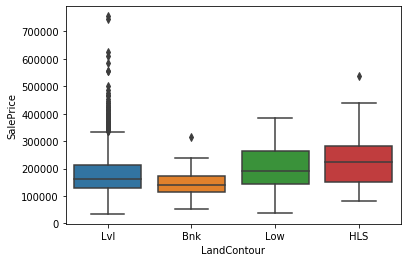

In [120]:
sns.boxplot(x='LandContour',y='SalePrice',data=df)

The ranges are too wide for there to be meaningful relationship between LandContour and the sale price

## Utilities

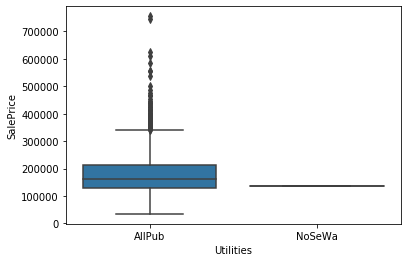

In [121]:
sns.boxplot(x='Utilities',y='SalePrice',data=df)

In [123]:
df['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

Nothing can be drawn from this variable

## LotConfig

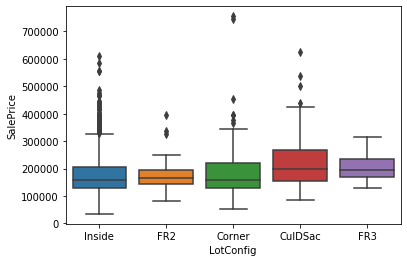

In [124]:
sns.boxplot(x='LotConfig',y='SalePrice',data=df)

This is probably worth making into dummy variables as some of the Lot types have a significantly higher mean sale price

## LandSlope

In [126]:
df['LandSlope'].value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

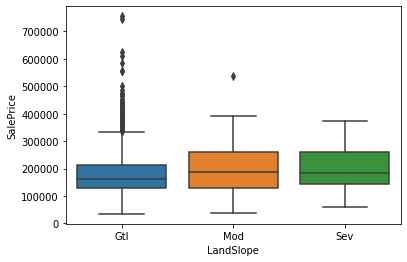

In [127]:
sns.boxplot(x='LandSlope',y='SalePrice',data=df)

Nothing of value

## Neightborhood

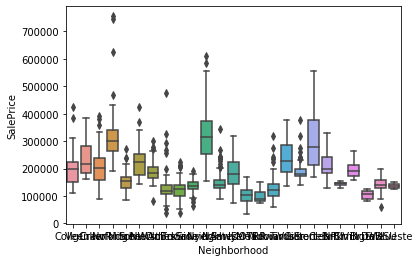

In [128]:
sns.boxplot(x='Neighborhood',y='SalePrice',data=df)

This is worth making into dummy variables as some neighborhoods will have much higher property values

## Conditions

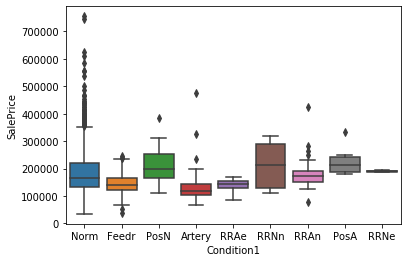

In [131]:
sns.boxplot(x='Condition1',y='SalePrice',data=df)

In [132]:
df['Condition1'].value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

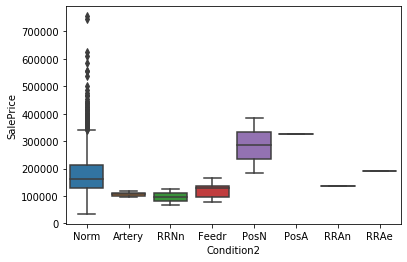

In [130]:
sns.boxplot(x='Condition2',y='SalePrice',data=df)

In [133]:
df['Condition2'].value_counts()

Norm      1445
Feedr        6
RRNn         2
Artery       2
PosN         2
RRAn         1
RRAe         1
PosA         1
Name: Condition2, dtype: int64

Since almost all the data is the same for condition2 this can be dropped. Condition1 might be worth making into dummy variables however

## BldgType

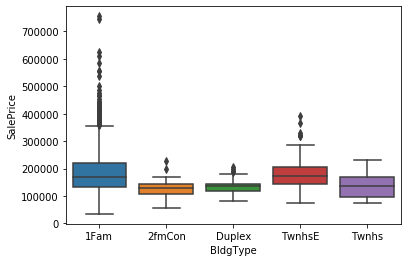

In [134]:
sns.boxplot(x='BldgType',y='SalePrice',data=df)

In [135]:
df['BldgType'].value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

There does not seem to be a very clear change in the price of the different types of buildings so this might be left off. Other variables that include information on the size of houses and quality will likely be more useful.

## HouseStyle

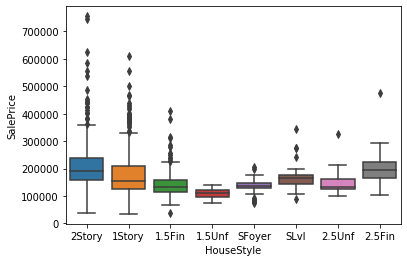

In [141]:
sns.boxplot(x='HouseStyle',y='SalePrice',data=df)

Again, I am expecting this kind of information to better expressed by size of the the house and quality of the house.

## OverallQual

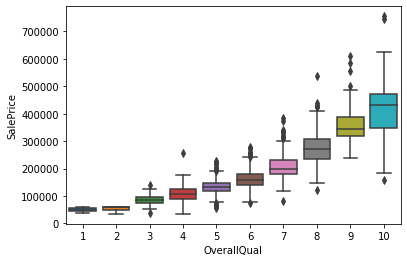

In [142]:
sns.boxplot(x='OverallQual',y='SalePrice',data=df)

There is a very strong trend of the quality of the house and the price.

## OverallCond

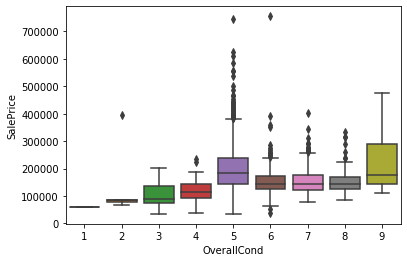

In [143]:
sns.boxplot(x='OverallCond',y='SalePrice',data=df)

Not as much of a trend in this one. 

## YearBuilt

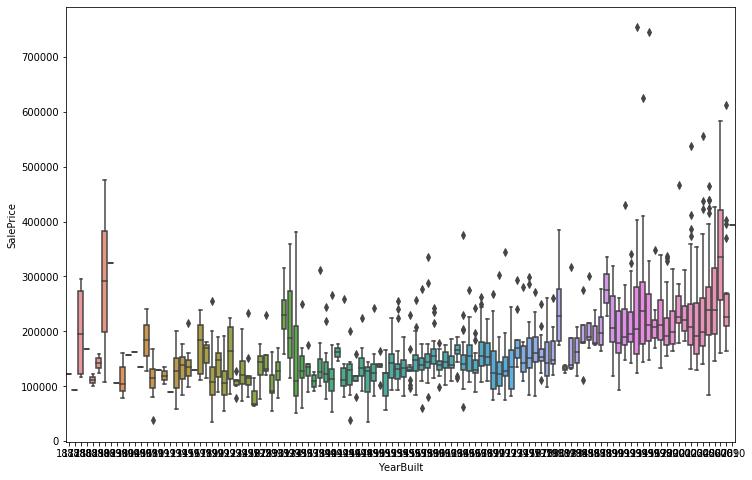

In [145]:
fig = plt.figure(figsize=(12,8))
sns.boxplot(x='YearBuilt',y='SalePrice',data=df)

There looks to be a slight increase for newer construction.

In [148]:
meanperyear = df.groupby('YearBuilt')['SalePrice'].mean()

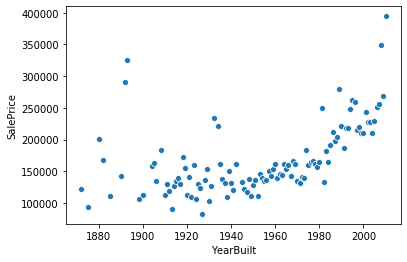

In [155]:
sns.scatterplot(x=meanperyear.index, y=meanperyear)

This plot of the mean sale price per year of house built more clearly shows the increase towards new homes. So the year can be included. Also it does not need to be made into a dummy variable, it can be treated as a continuous variable.

## YearRemodAdd

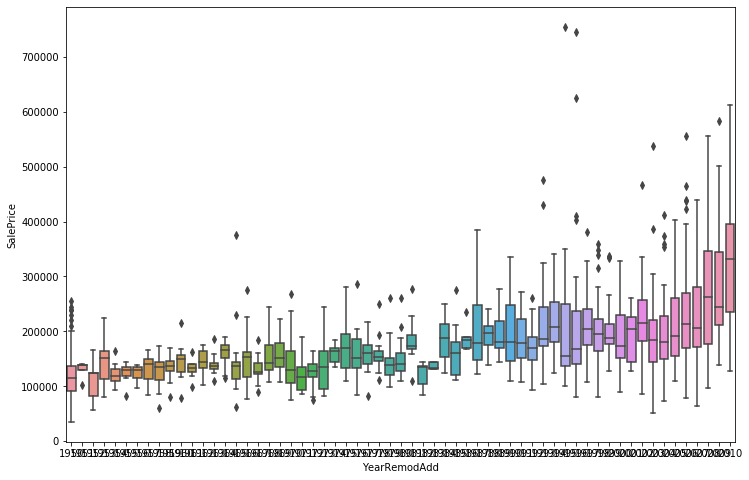

In [156]:
fig = plt.figure(figsize=(12,8))
sns.boxplot(x='YearRemodAdd',y='SalePrice',data=df)

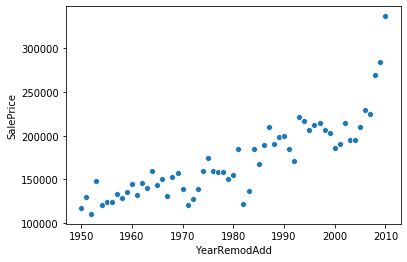

In [158]:
meanperyear = df.groupby('YearRemodAdd')['SalePrice'].mean()
sns.scatterplot(x=meanperyear.index, y=meanperyear)

Using the YearRemodAdd should yield even better results as a linear relationship is even more clear. Note this variable already is set to the original construction date if no remodel has occured making it ideal. 

## RoofStyle

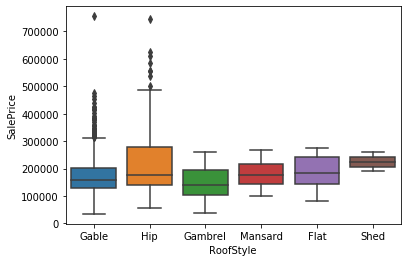

In [159]:
sns.boxplot(x='RoofStyle',y='SalePrice',data=df)

Nothing of value

## RoofMatl

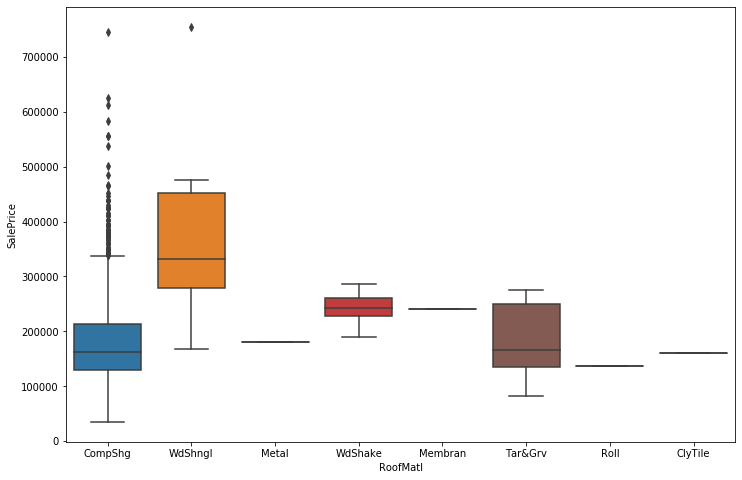

In [161]:
fig = plt.figure(figsize=(12,8))
sns.boxplot(x='RoofMatl',y='SalePrice',data=df)

This is likely better captured in the overall quality variable

## Exterior1st

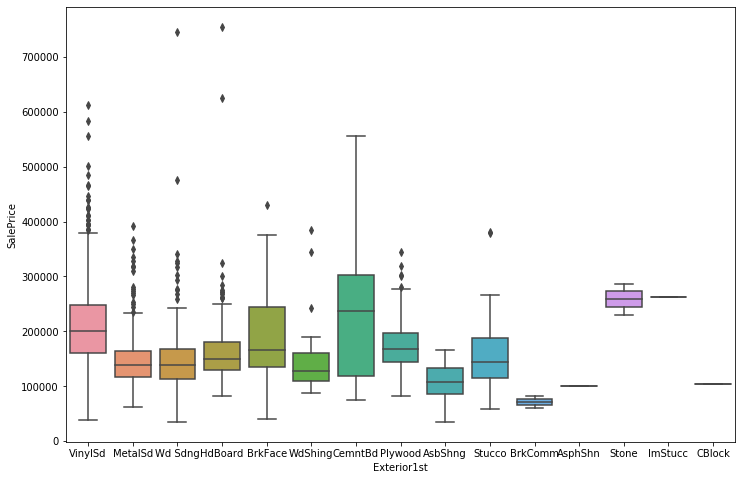

In [162]:
fig = plt.figure(figsize=(12,8))
sns.boxplot(x='Exterior1st',y='SalePrice',data=df)

Nothing of value

## MasVnrType

In [163]:
df['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

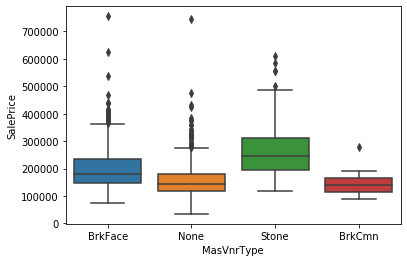

In [164]:
sns.boxplot(x='MasVnrType',y='SalePrice',data=df)

Nothing of value

## ExterQual

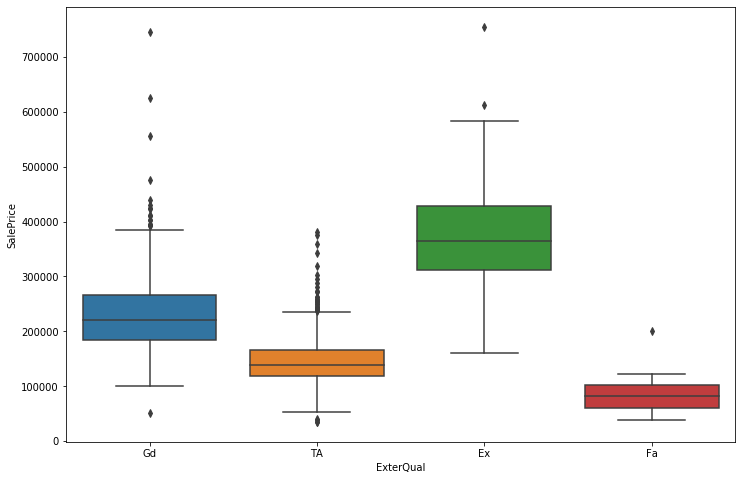

In [165]:
fig = plt.figure(figsize=(12,8))
sns.boxplot(x='ExterQual',y='SalePrice',data=df)

This information is better captured in the overall quality rating

## Foundation

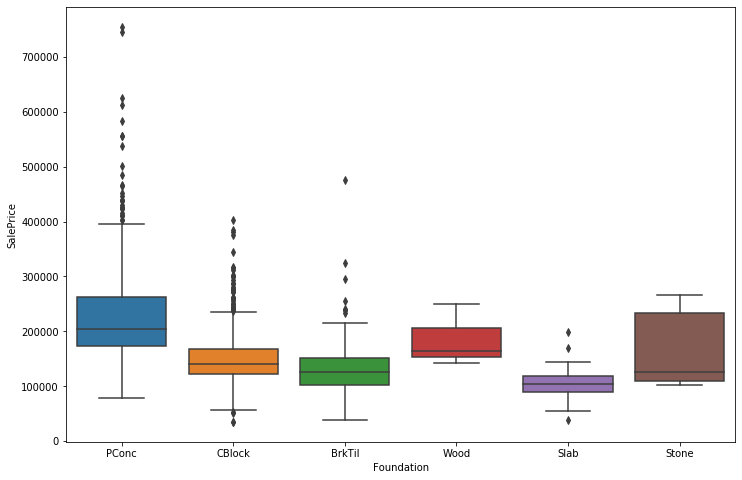

In [166]:
fig = plt.figure(figsize=(12,8))
sns.boxplot(x='Foundation',y='SalePrice',data=df)

Nothing of value

## Basement

There are a lot of variables that deal with the basement. Could be useful to combine some of them into a single feature

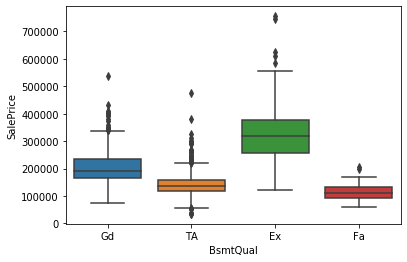

In [172]:
sns.boxplot(x='BsmtQual',y='SalePrice',data=df)

In [174]:
df['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [175]:
df['BsmtQual'].value_counts().sum()

1423

The quality simply measures the height of a basement, but it does seem important as an excellent basement clearly indicates a higher sales price

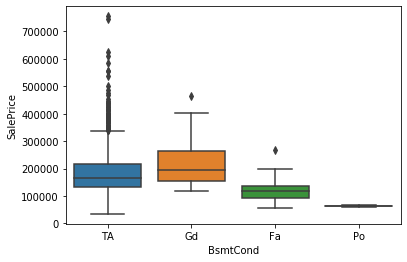

In [168]:
sns.boxplot(x='BsmtCond',y='SalePrice',data=df)

Condition seems to be less informative

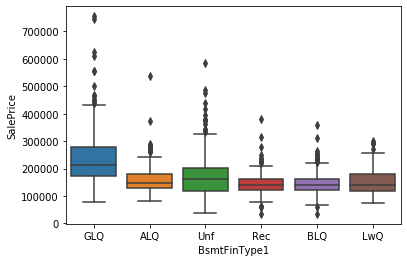

In [169]:
sns.boxplot(x='BsmtFinType1',y='SalePrice',data=df)

The type of basement also does not seem very informative

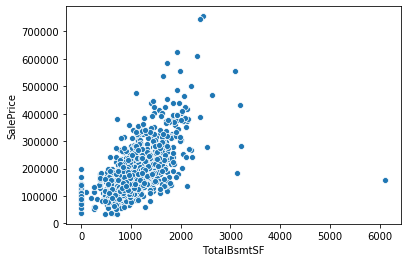

In [176]:
sns.scatterplot(x='TotalBsmtSF',y='SalePrice',data=df)

The squarefeet of the basement does seem to have some relationship, aside from homes with no basement

Perhaps if the squarefeet is combined with the height it will be even clearer?

TotalBsmtVol = TotalBsmtSF * height

Where height is found from BsmtQual:
    Ex = 5
    Gd = 4
    TA = 3
    Fa = 2
    Po = 1
    Na = 0

In [178]:
def bsmt_height(bsmtqual):
    if bsmtqual == 'Ex':
        return 5
    elif bsmtqual == 'Gd':
        return 4
    elif bsmtqual == 'TA':
        return 3
    elif bsmtqual == 'Fa':
        return 2
    elif bsmtqual == 'Po':
        return 1
    else:
        return 0
def bsmt_vol(sf, height):
    return sf*height
df['BsmtHeight'] = df.apply(lambda x: bsmt_height(x['BsmtQual']),axis=1)
df['BsmtVol'] = df.apply(lambda x: bsmt_vol(x['TotalBsmtSF'],x['BsmtHeight']),axis=1)

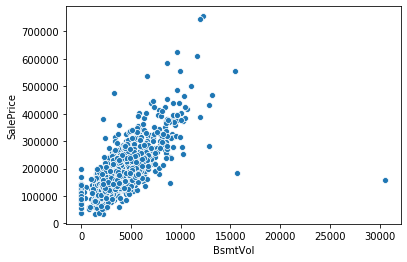

In [179]:
sns.scatterplot(x='BsmtVol',y='SalePrice',data=df)

Looks to be a slightly tighter spread compared to just the square foot as it better captures a high ceiling low footprint basement.

## Heating

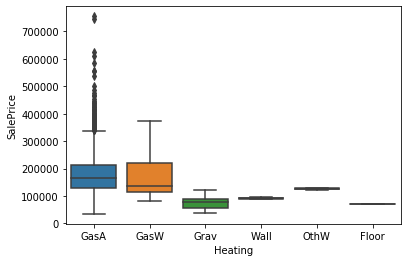

In [180]:
sns.boxplot(x='Heating',y='SalePrice',data=df)

No value

## Square Feet

This is broken down into different floors but for ease of use the GrLivArea value should capture all the non basement square feet needed

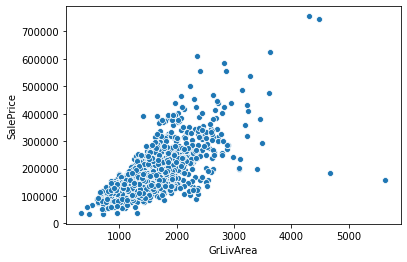

In [181]:
sns.scatterplot(x='GrLivArea',y='SalePrice',data=df)

This has a clear linear relationship with the sale price. Would adding the basement square feet help further? 

In [186]:
df['TotalSF'] = df['GrLivArea'] + df['TotalBsmtSF']

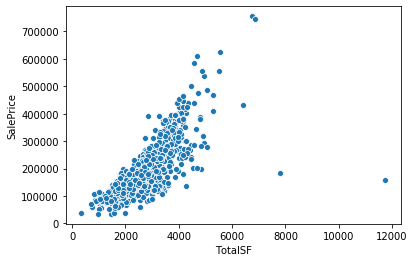

In [187]:
sns.scatterplot(x='TotalSF',y='SalePrice',data=df)

By including the basement square feet it compresses the spread of values which should return a better prediction. But this does lose the importance of basement heights so perhaps it is better to keep them seperate?

## Bathrooms

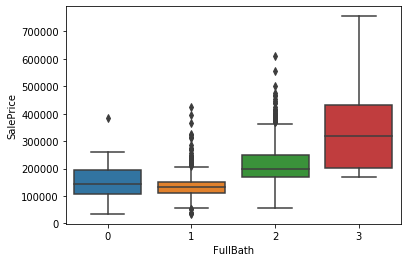

In [188]:
sns.boxplot(x='FullBath',y='SalePrice',data=df)

The number of bathrooms does have a correlation with price however I think this value is captured in the total SF of a house as it is likely that a larger house has more bathrooms.

## Kitchen

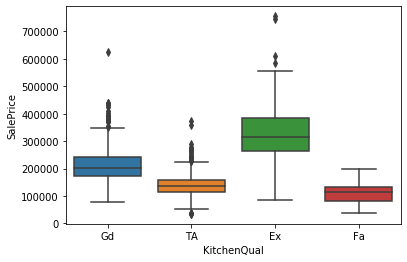

In [189]:
sns.boxplot(x='KitchenQual',y='SalePrice',data=df)

This data is likely in the overall quality rating already

## Functional

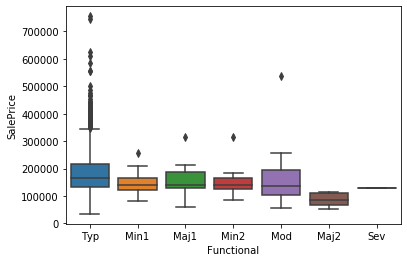

In [190]:
sns.boxplot(x='Functional',y='SalePrice',data=df)

No value

## Pool

There is not enough pools in the data set to warrant including in the model

In [192]:
df['PoolQC'].value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

## MiscVal

This could be a serious source of data leakage that includes information about the sale price

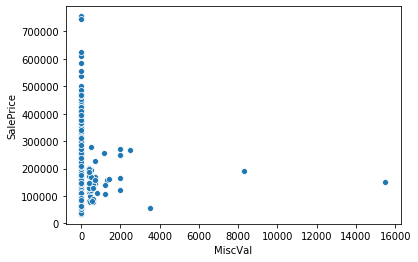

In [193]:
sns.scatterplot(x='MiscVal',y='SalePrice',data=df)

The data doesn't seem very informative anyways so it should just be omitted

## Date Sold

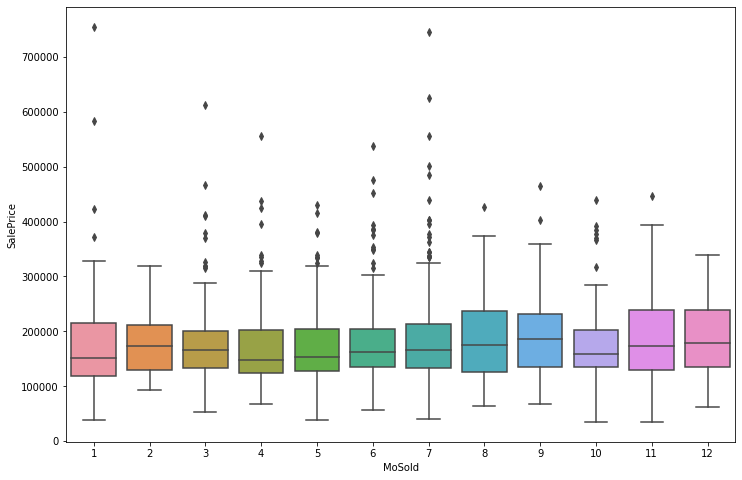

In [194]:
fig = plt.figure(figsize=(12,8))
sns.boxplot(x='MoSold',y='SalePrice',data=df)

Not much of a correlation with the Month Sold

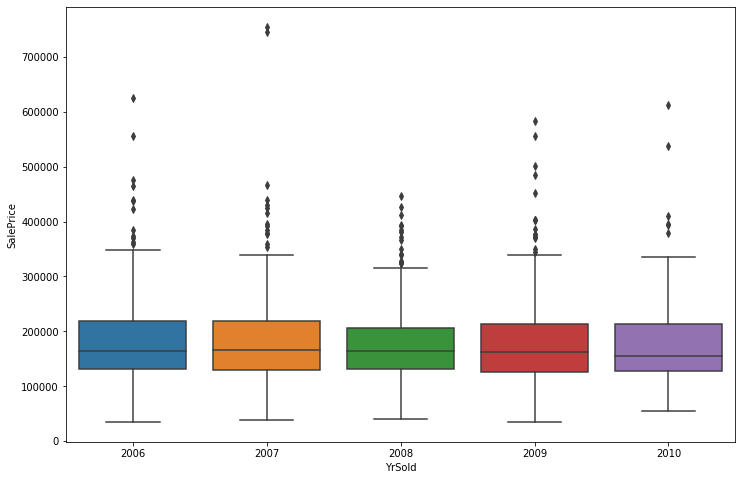

In [195]:
fig = plt.figure(figsize=(12,8))
sns.boxplot(x='YrSold',y='SalePrice',data=df)

Same goes for year sold

## Type of Sale

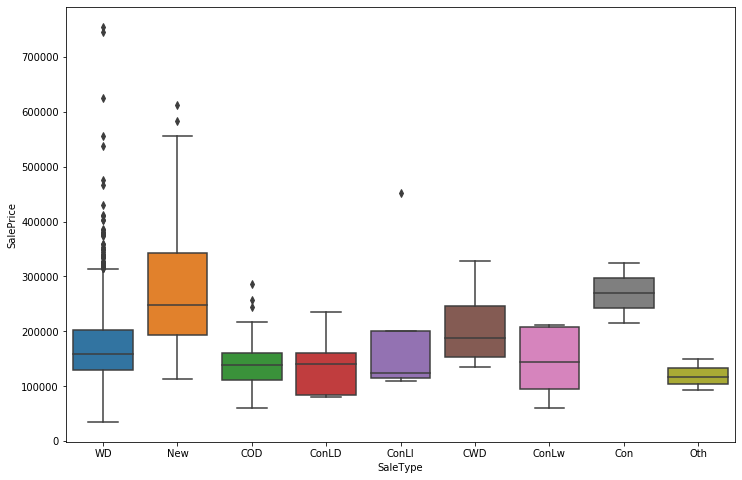

In [197]:
fig = plt.figure(figsize=(12,8))
sns.boxplot(x='SaleType',y='SalePrice',data=df)

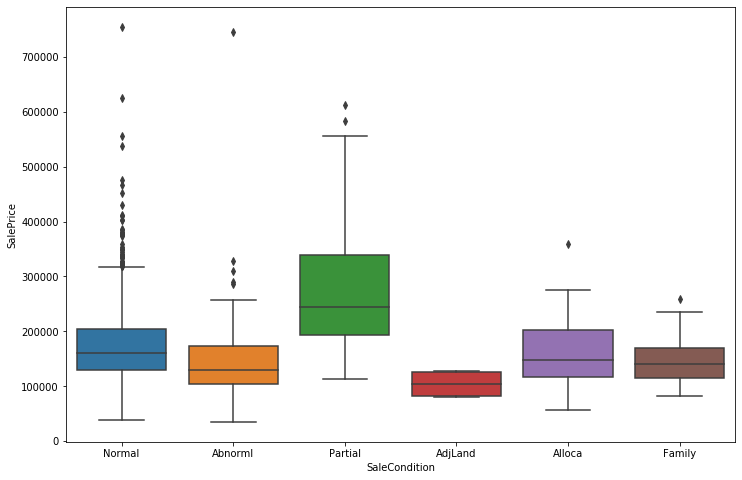

In [199]:
fig = plt.figure(figsize=(12,8))
sns.boxplot(x='SaleCondition',y='SalePrice',data=df)

There could be some use for these but for now I will leave them out. Although the SaleType as a dummy variable could be useful as New homes tend to be much higher priced.

# Variable Selection

## Based on the above EDA the following variables will be used for the model:

OverallQual - Continuous Variable

YearRemodAdd - Continuous Variable (Better captures the data compared to YearBuilt)

Neighborhood - Categorical (needs to be made into dummies)

TotalSF - Continuous

SaleType - Categorical (needs to be made into dummies)

In [204]:
X = df[['OverallQual','YearRemodAdd','TotalSF']]
y = df['SalePrice']

In [205]:
dummies = pd.get_dummies(df['Neighborhood'],drop_first=True)
X = pd.concat([X, dummies],axis=1)

In [207]:
dummies = pd.get_dummies(df['SaleType'],drop_first=True)
X = pd.concat([X, dummies],axis=1)

In [208]:
X.head()

,OverallQual,YearRemodAdd,TotalSF,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,...,Timber,Veenker,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD
0,7,2003,2566,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,6,1976,2524,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,7,2002,2706,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,7,1970,2473,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,8,2000,3343,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Training Model

In [216]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=2)

In [212]:
model = LinearRegression()

In [213]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [222]:
predictions = model.predict(X_test)
residuals = y_test - predictions

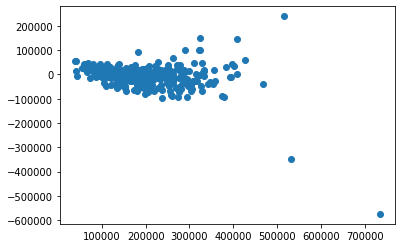

In [223]:
plt.scatter(predictions, residuals)

The residual plot shows a clear sign of heteroscedasticity. Possible solution is to transform Y into log(Y) and refit

In [225]:
log_y = np.log(y)

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X,log_y,test_size=.3,random_state=2)

In [227]:
model_2 = LinearRegression()
model_2.fit(X_train,y_train)
predictions_log = model_2.predict(X_test)
residuals_log = y_test - predictions_log

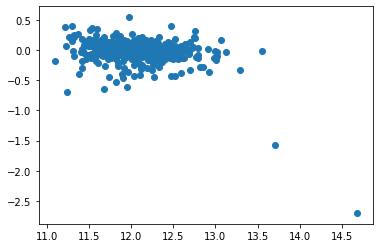

In [228]:
plt.scatter(predictions_log, residuals_log)

This removed some of the heteroscedasticity but there are still a few values that are way outside the ideal range. These could be from extremely high value houses in the data set. Lets try this style fit without those present

## Outlier Removal

In [229]:
df['SalePrice'].sort_values(ascending=False).head(10)

691     755000
1182    745000
1169    625000
898     611657
803     582933
1046    556581
440     555000
769     538000
178     501837
798     485000
Name: SalePrice, dtype: int64

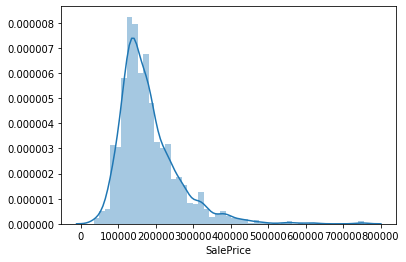

In [231]:
sns.distplot(df['SalePrice'])

Attempting the model after removing any house above 500k

In [232]:
df2 = df.copy()

In [241]:
df2 = df2[df2['SalePrice'] < 500000]

## Now repeat the model fitting

In [262]:
X = df2[['OverallQual','YearRemodAdd','TotalSF']]
y = np.log(df2['SalePrice'])
dummies = pd.get_dummies(df2['Neighborhood'],drop_first=True)
X = pd.concat([X, dummies],axis=1)
dummies = pd.get_dummies(df2['SaleType'],drop_first=True)
X = pd.concat([X, dummies],axis=1)

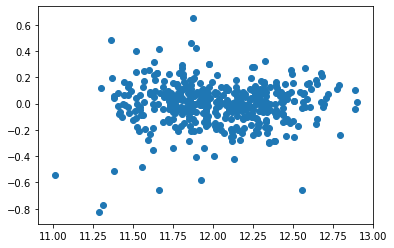

In [263]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=22)
model = LinearRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
residuals = y_test - predictions
plt.scatter(predictions, residuals)

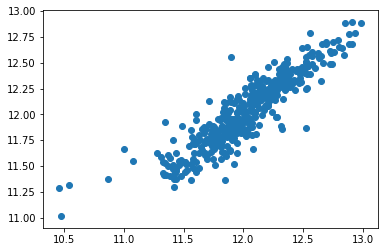

In [264]:
plt.scatter(y_test,predictions)

# Submissions

In [300]:
test_sub = pd.read_csv('sample_submission.csv')
test_sub.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [270]:
test = pd.read_csv('test.csv')

In [284]:
#replace the Nan value in TotalBsmtSF with 0
test.loc[test['TotalBsmtSF'].isnull(),'TotalBsmtSF'] = 0

In [286]:
test['TotalSF'] = test['GrLivArea'] + test['TotalBsmtSF']
X = test[['OverallQual','YearRemodAdd','TotalSF']]
dummies = pd.get_dummies(test['Neighborhood'],drop_first=True)
X = pd.concat([X, dummies],axis=1)
dummies = pd.get_dummies(test['SaleType'],drop_first=True)
X = pd.concat([X, dummies],axis=1)

In [288]:
test_predictions = model.predict(X)

In [290]:
test_predictions

array([11.72196205, 11.95982878, 12.00888051, ..., 11.92791603,
       11.82282937, 12.20816478])

In [301]:
submission = pd.DataFrame(test['Id'])
predictions = pd.DataFrame(np.exp(test_predictions),columns=['SalePrice'])

In [302]:
submission = pd.concat([submission, predictions],axis=1)

In [304]:
submission.head()

,Id,SalePrice
0,1461,123249.009239
1,1462,156346.312301
2,1463,164206.573582
3,1464,179956.747875
4,1465,234720.917485


In [309]:
submission.to_csv('my_submission.csv',index=False)

In [310]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
Id           1459 non-null int64
SalePrice    1459 non-null float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB


In [311]:
test_sub = pd.read_csv('my_submission.csv')
test_sub.head()

,Id,SalePrice
0,1461,123249.009239
1,1462,156346.312301
2,1463,164206.573582
3,1464,179956.747875
4,1465,234720.917485
